In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
song_df = pd.read_csv('complete_song_data.csv')
song_df.head()

,Unnamed: 0,artist,seq,song,label,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,error
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626,0.783,0.563,6.0,-8.613,1.0,...,0.6340,114.897,audio_features,2ne4ZuEhn35sGRftyI8jJP,spotify:track:2ne4ZuEhn35sGRftyI8jJP,https://api.spotify.com/v1/tracks/2ne4ZuEhn35s...,https://api.spotify.com/v1/audio-analysis/2ne4...,331440.0,4.0,NaN
1,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371,0.293,0.604,1.0,-8.742,1.0,...,0.3750,79.946,audio_features,4PoGx0KVpaqVWxSF9j11O3,spotify:track:4PoGx0KVpaqVWxSF9j11O3,https://api.spotify.com/v1/tracks/4PoGx0KVpaqV...,https://api.spotify.com/v1/audio-analysis/4PoG...,215533.0,4.0,NaN
2,12,Elis,I'm a lonely stranger \r\nIn this world of pai...,My Only Love,0.201,0.538,0.715,9.0,-5.090,0.0,...,0.2140,120.034,audio_features,3ZeKGUWSkRHZ9KuxJ8upda,spotify:track:3ZeKGUWSkRHZ9KuxJ8upda,https://api.spotify.com/v1/tracks/3ZeKGUWSkRHZ...,https://api.spotify.com/v1/audio-analysis/3ZeK...,258947.0,4.0,NaN
3,20,Elis,The long summer\nHas gone\nThe autumn leaves\n...,Rebirth,0.324,0.199,0.198,5.0,-13.103,0.0,...,0.0524,145.809,audio_features,0goZaLEBFvMwYaSpQhkk53,spotify:track:0goZaLEBFvMwYaSpQhkk53,https://api.spotify.com/v1/tracks/0goZaLEBFvMw...,https://api.spotify.com/v1/audio-analysis/0goZ...,187624.0,4.0,NaN
4,24,Elis,Don't dare to leave\r\nYou can't make a single...,Innocent Hearts,0.273,0.483,0.425,9.0,-7.912,0.0,...,0.2530,119.939,audio_features,4pSRehltWcWfPjP7Wk5gmJ,spotify:track:4pSRehltWcWfPjP7Wk5gmJ,https://api.spotify.com/v1/tracks/4pSRehltWcWf...,https://api.spotify.com/v1/audio-analysis/4pSR...,262907.0,4.0,NaN


In [5]:
song_df_2 = pd.read_csv('spotify_millsongdata.csv')
song_df_2.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [11]:
print(song_df_2.shape[0])
print(song_df.shape[0])
print(song_df_2.shape[0]+song_df.shape[0])

57650
31023
88673


In [15]:
song_df_selected = song_df[['artist', 'song', 'seq']].rename(columns={'seq': 'text'})

song_df_2_selected = song_df_2[['artist', 'song', 'text']].rename(columns={'text': 'text'})

combined_df = pd.concat([song_df_selected, song_df_2_selected])

combined_df = combined_df.drop_duplicates(subset=['artist', 'song'], keep='first')

combined_df.reset_index(drop=True, inplace=True)
combined_df.shape

(86810, 3)

In [43]:
combined_df.head(60000)

,artist,song,text,cleaned_text,lyrics_vector
0,Elijah Blake,Everyday,"No, no\r\nI ain't ever trapped out the bando\r...",aint ever trap bando oh lord dont get wrong kn...,"[0.01842727, 0.011369616, -0.05919706, 0.15994..."
1,Elijah Blake,Shadows & Diamonds,"I see a midnight panther, so gallant and so br...",see midnight panther gallant brave find find a...,"[0.03060027, -0.006800313, 0.03550704, 0.12838..."
2,Elis,My Only Love,I'm a lonely stranger \r\nIn this world of pai...,im lonely stranger world pain dark hour im alo...,"[0.038891766, 0.024412412, 0.0143944, 0.124934..."
3,Elis,Rebirth,The long summer\nHas gone\nThe autumn leaves\n...,long summer go autumn leave start fall yesterd...,"[0.02268045, 0.07526063, -0.003750985, 0.08202..."
4,Elis,Innocent Hearts,Don't dare to leave\r\nYou can't make a single...,dont dare leave cant make single step without ...,"[0.030382963, 0.04862272, 0.045493934, 0.12519..."
...,...,...,...,...,...
59995,Dolly Parton,Butterflies,(Dolly Parton) \r\nI would spin for you a bla...,dolly parton would spin blanket gold silver th...,"[0.060364503, 0.036728576, 0.0067309877, 0.097..."
59996,Dolly Parton,Calm On The Water,(Dolly Parton) \r\nIn a dream I was walkin' i...,dolly parton dream walkin beautiful field gath...,"[0.0739349, 0.027636634, 0.036018055, 0.045542..."
59997,Dolly Parton,Cash On The Barrelhead,I got in a little trouble at the county seat ...,get little trouble county seat lord put jailho...,"[0.050238013, 0.05042149, 0.023936387, 0.09095..."
59998,Dolly Parton,Change,(Dolly Parton) \r\nSomeday when I'm over you ...,dolly parton someday im think im able well mig...,"[0.03278652, 0.021046132, -0.01614225, 0.15179..."


In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import TweetTokenizer

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\maxhi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maxhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
tweet_tokenizer = TweetTokenizer()

In [19]:
%%time
def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[\r\n]+', ' ', text)  
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'[\d]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip() 
    
    tokens = tweet_tokenizer.tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)  # POS tag tokens
    
    lemmatized = [
        lemmatizer.lemmatize(token, get_wordnet_pos(tag))
        for token, tag in tagged_tokens
        if token not in stop_words and token.isalpha()
    ]
    return ' '.join(lemmatized)

# Apply the preprocessing to text from dataframe
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)


CPU times: total: 8min 8s
Wall time: 9min 5s


In [20]:
%%time
from gensim.models import KeyedVectors

# Load word2vec model
model_kv = KeyedVectors.load("word2vec-google-news-300.model")


CPU times: total: 3.11 s
Wall time: 4.74 s


In [21]:
%%time
def lyrics_to_vector(lyrics, model):

    tokens = tweet_tokenizer.tokenize(lyrics)

    tokens = [token for token in tokens if token in model.key_to_index]

    if len(tokens) == 0:
        return np.zeros(model.vector_size)

    vector = np.mean([model[token] for token in tokens], axis=0)
    return vector

combined_df['lyrics_vector'] = combined_df['cleaned_text'].apply(lambda x: lyrics_to_vector(x, model_kv))

CPU times: total: 39.7 s
Wall time: 45.6 s


In [25]:
combined_df.to_pickle("lyrics_dataframe_with_vectors.pkl")

In [27]:
combined_df=pd.read_pickle('lyrics_dataframe_with_vectors.pkl')

In [28]:
%%time
word2vec_matrix = np.array(combined_df['lyrics_vector'].tolist())
np.save("word2vec_matrix.npy", word2vec_matrix) 

CPU times: total: 78.1 ms
Wall time: 234 ms


## Too large to create simiarlity matrx in one go, so compute in chunks

In [29]:
def compute_similarity_in_chunks(X, chunk_size=1000):
    sim_matrix = np.zeros((X.shape[0], X.shape[0]), dtype=np.float32)
    
    for start in range(0, X.shape[0], chunk_size):
        end = min(start + chunk_size, X.shape[0])
        sim_chunk = cosine_similarity(X[start:end], X)
        sim_matrix[start:end] = sim_chunk
        
    return sim_matrix

# Assuming 'word2vec_matrix' is the matrix you are working with
similarity_matrix = compute_similarity_in_chunks(word2vec_matrix)

In [30]:
similarity_matrix.shape

(86810, 86810)

In [32]:
np.save("similarity_matrix.npy", similarity_matrix)

In [33]:
def get_song_index(df, artist_name, song_title):
    match = df[(df['artist'] == artist_name) & (df['song'] == song_title)]
    if not match.empty:
        return match.index[0]
    return None

In [34]:
def recommend_songs(df, similarity_matrix, artist_name, song_title, top_n=5):
    song_index = get_song_index(df, artist_name, song_title)
    if song_index is None:
        return f"No song found for {artist_name} - {song_title}"
        
    song_similarities = similarity_matrix[song_index]
    similar_indices = np.argsort(-song_similarities)
    
    top_indices = similar_indices[1:top_n+1]

    return df.iloc[top_indices].assign(similarity=song_similarities[top_indices])

In [46]:
artist_name = "Dolly Parton"
song_title = "Calm On The Water"
recommended_songs = recommend_songs(combined_df, similarity_matrix, artist_name, song_title)
print(recommended_songs)

                         artist                       song  \
40417             Joni Mitchell                  Face Lift   
11247             Julius LaRosa  Suddenly There's a Valley   
25601  The Sons of the Pioneers  Suddenly There's a Valley   
57162               Celine Dion         A New Day Has Come   
52128                    Xscape     Softest Place On Earth   

                                                    text  \
40417  I went so numb on Christmas day  \r\nI couldn'...   
11247  When you've climbed the highest mountain\r\nWh...   
25601  When you've climbed the highest mountain\r\nWh...   
57162  I was waiting for so long  \r\nFor a miracle t...   
52128  It's a glowing little feeling,  \r\nLike a sum...   

                                            cleaned_text  \
40417  go numb christmas day couldnt feel hand foot s...   
11247  youve climb high mountain cloud hold sunshine ...   
25601  youve climb high mountain cloud hold sunshine ...   
57162  wait long miracle c

In [3]:
cleaned_song_df=pd.read_pickle('lyrics_dataframe_with_vectors.pkl')
cleaned_song_df.head()

,artist,song,text,cleaned_text,lyrics_vector
0,Elijah Blake,Everyday,"No, no\r\nI ain't ever trapped out the bando\r...",aint ever trap bando oh lord dont get wrong kn...,"[0.01842727, 0.011369616, -0.05919706, 0.15994..."
1,Elijah Blake,Shadows & Diamonds,"I see a midnight panther, so gallant and so br...",see midnight panther gallant brave find find a...,"[0.03060027, -0.006800313, 0.03550704, 0.12838..."
2,Elis,My Only Love,I'm a lonely stranger \r\nIn this world of pai...,im lonely stranger world pain dark hour im alo...,"[0.038891766, 0.024412412, 0.0143944, 0.124934..."
3,Elis,Rebirth,The long summer\nHas gone\nThe autumn leaves\n...,long summer go autumn leave start fall yesterd...,"[0.02268045, 0.07526063, -0.003750985, 0.08202..."
4,Elis,Innocent Hearts,Don't dare to leave\r\nYou can't make a single...,dont dare leave cant make single step without ...,"[0.030382963, 0.04862272, 0.045493934, 0.12519..."


In [4]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(cleaned_song_df['cleaned_text'])

CPU times: total: 4.39 s
Wall time: 6.78 s


In [9]:
%%time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

n_components_options = [10, 15, 20]
doc_topic_prior_options = [0.1, 0.5, 0.9]
topic_word_prior_options = [0.01, 0.05, 0.1]

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

results = []

for n_components in n_components_options:
    for doc_topic_prior in doc_topic_prior_options:
        for topic_word_prior in topic_word_prior_options:
            lda = LatentDirichletAllocation(n_components=n_components,
                                            doc_topic_prior=doc_topic_prior,
                                            topic_word_prior=topic_word_prior,
                                            learning_method='online',
                                            max_iter=10,
                                            random_state=42)
            lda.fit(dtm)  
            log_likelihood = lda.score(dtm)
            perplexity = lda.perplexity(dtm)

            print(f"\nConfig: n_components={n_components}, doc_topic_prior={doc_topic_prior}, topic_word_prior={topic_word_prior}")
            display_topics(lda, vectorizer.get_feature_names_out(), 10)
            print("Log Likelihood:", log_likelihood)
            print("Perplexity:", perplexity)
            print("-" * 80)

            results.append((n_components, doc_topic_prior, topic_word_prior, log_likelihood, perplexity))


Config: n_components=10, doc_topic_prior=0.1, topic_word_prior=0.01
Topic 0:
ride dead brother man new city kill white big black
Topic 1:
woman good dont run make shes hey let man yeah
Topic 2:
think way feel time youre want say dont know im
Topic 3:
dem ba mi di bye ha da ah na la
Topic 4:
angel heaven sky burn high sing lord light night come
Topic 5:
away home rain dance blue sun time old like day
Topic 6:
true forever make hold fall ill let dream heart love
Topic 7:
free time hand god stand eye die live world life
Topic 8:
love come let boy ooh wanna little girl baby oh
Topic 9:
money cause rock em fuck nigga ya aint like im
Log Likelihood: -85441165.62107012
Perplexity: 30105.033041170882
--------------------------------------------------------------------------------

Config: n_components=10, doc_topic_prior=0.1, topic_word_prior=0.05
Topic 0:
white blood dog big new dead city brother kill black
Topic 1:
woman run dont like make shes hey let man yeah
Topic 2:
think way feel time 

In [10]:
results

[(10, 0.1, 0.01, -85441165.62107012, 30105.033041170882),
 (10, 0.1, 0.05, -58592283.168974936, 1178.363787793191),
 (10, 0.1, 0.1, -58592425.2373986, 1178.3839935566814),
 (10, 0.5, 0.01, -85060808.04925701, 28754.220304756083),
 (10, 0.5, 0.05, -58287548.77326174, 1135.810494149416),
 (10, 0.5, 0.1, -58320650.18466874, 1140.3573880667122),
 (10, 0.9, 0.01, -85147413.02474211, 29056.362117240624),
 (10, 0.9, 0.05, -58320193.033986375, 1140.294468899774),
 (10, 0.9, 0.1, -58363936.80244362, 1146.3308240671374),
 (15, 0.1, 0.01, -85185078.36585177, 29188.755194843157),
 (15, 0.1, 0.05, -58428268.31974848, 1155.266255099716),
 (15, 0.1, 0.1, -58463414.949236885, 1160.177389775164),
 (15, 0.5, 0.01, -84741172.7401121, 27666.040713715378),
 (15, 0.5, 0.05, -58152435.41572225, 1117.4382421191638),
 (15, 0.5, 0.1, -58234153.74577297, 1128.514195368021),
 (15, 0.9, 0.01, -84809544.54508196, 27895.292026710737),
 (15, 0.9, 0.05, -58164563.98869254, 1119.0752310519204),
 (15, 0.9, 0.1, -5824821

In [11]:
df = pd.DataFrame(results, columns=['n_components', 'doc_topic_prior', 'topic_word_prior', 'log_likelihood', 'perplexity'])
best_log_likelihood = df[df.log_likelihood == df.log_likelihood.max()]
best_perplexity = df[df.perplexity == df.perplexity.min()]

print("Best Model by Log Likelihood:")
print(best_log_likelihood)
print("\nBest Model by Perplexity:")
print(best_perplexity)

Best Model by Log Likelihood:
    n_components  doc_topic_prior  topic_word_prior  log_likelihood  \
22            20              0.5              0.05   -5.811465e+07   

     perplexity  
22  1112.353197  

Best Model by Perplexity:
    n_components  doc_topic_prior  topic_word_prior  log_likelihood  \
22            20              0.5              0.05   -5.811465e+07   

     perplexity  
22  1112.353197  


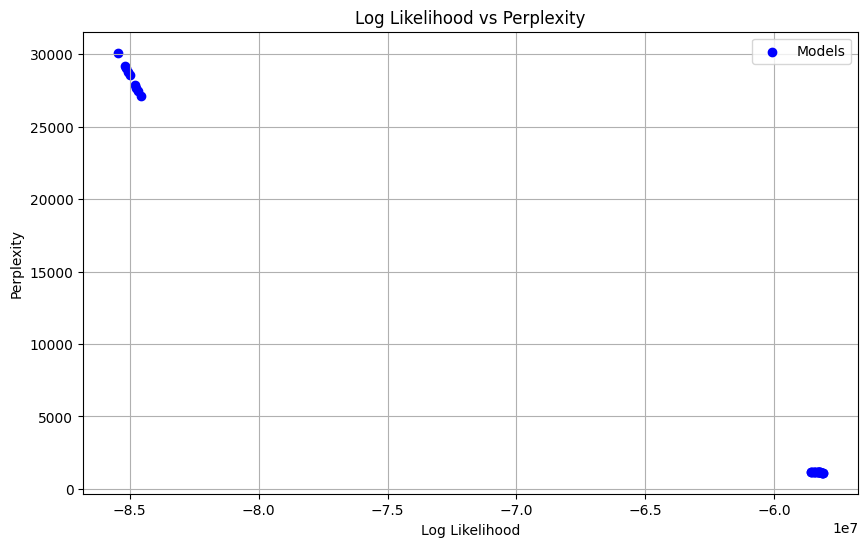

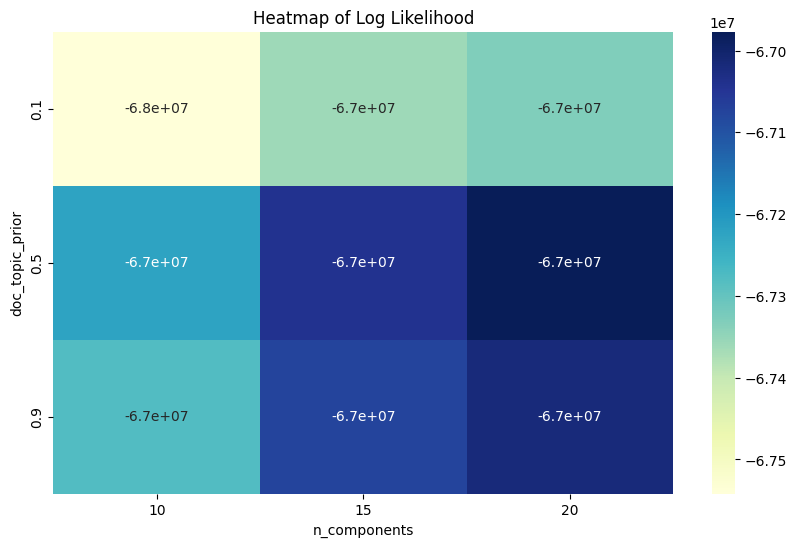

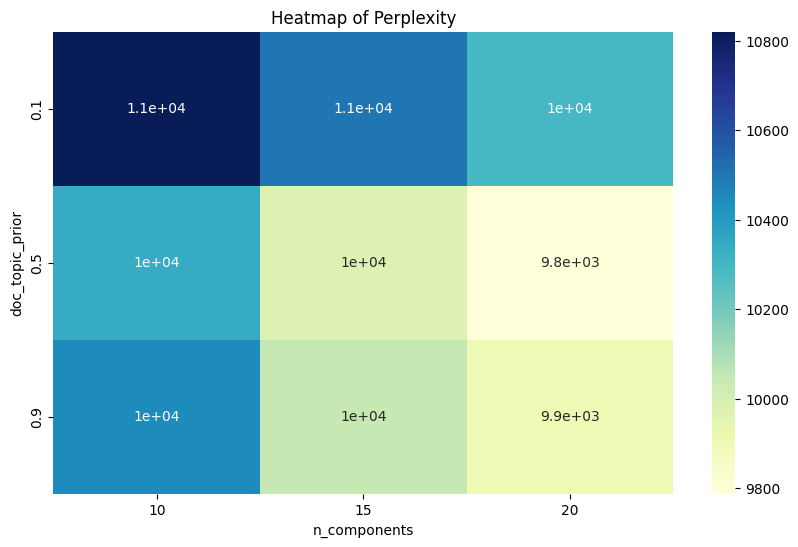

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(results, columns=['n_components', 'doc_topic_prior', 'topic_word_prior', 'log_likelihood', 'perplexity'])

plt.figure(figsize=(10, 6))
plt.scatter(df['log_likelihood'], df['perplexity'], c='blue', label='Models')
plt.xlabel('Log Likelihood')
plt.ylabel('Perplexity')
plt.title('Log Likelihood vs Perplexity')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
heatmap1_data = pd.pivot_table(df, values='log_likelihood', 
                     index=['doc_topic_prior'], 
                     columns='n_components')
sns.heatmap(heatmap1_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Log Likelihood')
plt.show()

plt.figure(figsize=(10, 6))
heatmap2_data = pd.pivot_table(df, values='perplexity', 
                     index=['doc_topic_prior'], 
                     columns='n_components')
sns.heatmap(heatmap2_data, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Perplexity')
plt.show()

In [16]:
n_components_options = [20,25]
doc_topic_prior_options = [0.45, 0.5, 0.55]
topic_word_prior_options = [0.045, 0.05, 0.055]

results_refined = []

for n_components in n_components_options:
    for doc_topic_prior in doc_topic_prior_options:
        for topic_word_prior in topic_word_prior_options:
            lda = LatentDirichletAllocation(n_components=n_components,
                                            doc_topic_prior=doc_topic_prior,
                                            topic_word_prior=topic_word_prior,
                                            learning_method='online',
                                            max_iter=10,
                                            random_state=42)
            lda.fit(dtm)
            log_likelihood = lda.score(dtm)
            perplexity = lda.perplexity(dtm)
            print(f"\nConfig: n_components={n_components}, doc_topic_prior={doc_topic_prior}, topic_word_prior={topic_word_prior}")
            display_topics(lda, vectorizer.get_feature_names_out(), 10)
            print("Log Likelihood:", log_likelihood)
            print("Perplexity:", perplexity)
            print("-" * 80)
            results_refined.append((n_components, doc_topic_prior, topic_word_prior, log_likelihood, perplexity))


Config: n_components=20, doc_topic_prior=0.45, topic_word_prior=0.045
Topic 0:
star long ah sleep dark morning lonely light day night
Topic 1:
hate like whats thats help burn hard break man make
Topic 2:
think say chorus feel need good like want know dont
Topic 3:
ay que ba dem di mi gimme da la home
Topic 4:
bad say boy ooh ya gotta hey girl aint yeah
Topic 5:
sun free rain fall youll wont hold let ill youre
Topic 6:
lover arm sweet know make true forever kiss heart love
Topic 7:
believe leave thing tell try know ive way life say
Topic 8:
young old girl sky fly shes like blue dream little
Topic 9:
little hot come low babe honey christmas high tonight baby
Topic 10:
doo band fast hit like floor wild step round watch
Topic 11:
rise beautiful kill blood black end fight dead hell die
Topic 12:
guide surrender thrill paradise lip lovely shame dear close eye
Topic 13:
street water say town city ride old new man big
Topic 14:
king bear angel save bring jesus heaven lord god oh
Topic 15:
gun

In [17]:
results_refined

[(20, 0.45, 0.045, -58146722.886741295, 1116.6680539764457),
 (20, 0.45, 0.05, -58156732.95110549, 1118.0180047540462),
 (20, 0.45, 0.055, -58166332.87722948, 1119.314177569084),
 (20, 0.5, 0.045, -58105571.04484382, 1111.1354464380804),
 (20, 0.5, 0.05, -58114646.29695533, 1112.3531965196346),
 (20, 0.5, 0.055, -58126959.66157399, 1114.0075823397378),
 (20, 0.55, 0.045, -58074466.34005752, 1106.9718108388597),
 (20, 0.55, 0.05, -58082494.12621386, 1108.0449038482338),
 (20, 0.55, 0.055, -58094224.18928233, 1109.6147596722094),
 (25, 0.45, 0.045, -58098378.69100417, 1110.1712974505213),
 (25, 0.45, 0.05, -58113669.64202861, 1112.2220813781819),
 (25, 0.45, 0.055, -58129823.066555895, 1114.3926531193122),
 (25, 0.5, 0.045, -58058379.205439396, 1104.8245327526934),
 (25, 0.5, 0.05, -58070812.75668997, 1106.4837719579948),
 (25, 0.5, 0.055, -58086187.53805965, 1108.538960208486),
 (25, 0.55, 0.045, -58060174.51775591, 1105.0639607681696),
 (25, 0.55, 0.05, -58074482.76554936, 1106.9740054

In [18]:
df2 = pd.DataFrame(results_refined, columns=['n_components', 'doc_topic_prior', 'topic_word_prior', 'log_likelihood', 'perplexity'])

best_log_likelihood = df[df.log_likelihood == df.log_likelihood.max()]

best_perplexity = df[df.perplexity == df.perplexity.min()]

print("Best Model by Log Likelihood:")
print(best_log_likelihood)
print("\nBest Model by Perplexity:")
print(best_perplexity)

Best Model by Log Likelihood:
    n_components  doc_topic_prior  topic_word_prior  log_likelihood  \
22            20              0.5              0.05   -5.811465e+07   

     perplexity  
22  1112.353197  

Best Model by Perplexity:
    n_components  doc_topic_prior  topic_word_prior  log_likelihood  \
22            20              0.5              0.05   -5.811465e+07   

     perplexity  
22  1112.353197  


In [19]:
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics,doc_topic_prior=0.5, topic_word_prior=0.05, random_state=42)
lda_topic_matrix = lda.fit_transform(dtm)

for i in range(n_topics):
    cleaned_song_df[f'topic_{i}'] = lda_topic_matrix[:, i]

In [20]:
cleaned_song_df.head()

,artist,song,text,cleaned_text,lyrics_vector,topic_0,topic_1,topic_2,topic_3,topic_4,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,Elijah Blake,Everyday,"No, no\r\nI ain't ever trapped out the bando\r...",aint ever trap bando oh lord dont get wrong kn...,"[0.01842727, 0.011369616, -0.05919706, 0.15994...",0.002653,0.326676,0.037291,0.002513,0.027897,...,0.006855,0.002804,0.015957,0.002772,0.008814,0.002649,0.025315,0.008026,0.008632,0.003621
1,Elijah Blake,Shadows & Diamonds,"I see a midnight panther, so gallant and so br...",see midnight panther gallant brave find find a...,"[0.03060027, -0.006800313, 0.03550704, 0.12838...",0.087218,0.024503,0.024038,0.006444,0.008069,...,0.033939,0.018364,0.007862,0.012702,0.006451,0.008325,0.007069,0.007159,0.008428,0.316952
2,Elis,My Only Love,I'm a lonely stranger \r\nIn this world of pai...,im lonely stranger world pain dark hour im alo...,"[0.038891766, 0.024412412, 0.0143944, 0.124934...",0.069213,0.013307,0.013557,0.012646,0.012969,...,0.016142,0.012909,0.081579,0.055616,0.019091,0.015203,0.013834,0.013718,0.195573,0.014113
3,Elis,Rebirth,The long summer\nHas gone\nThe autumn leaves\n...,long summer go autumn leave start fall yesterd...,"[0.02268045, 0.07526063, -0.003750985, 0.08202...",0.523858,0.009507,0.012426,0.008451,0.008716,...,0.009337,0.008784,0.029309,0.010376,0.009191,0.066685,0.010264,0.009978,0.061387,0.009279
4,Elis,Innocent Hearts,Don't dare to leave\r\nYou can't make a single...,dont dare leave cant make single step without ...,"[0.030382963, 0.04862272, 0.045493934, 0.12519...",0.008546,0.006035,0.005186,0.005123,0.026768,...,0.022123,0.006936,0.124767,0.005420,0.025382,0.006922,0.006544,0.042172,0.327337,0.027144


In [21]:
cleaned_song_df.to_pickle("song_df_with_vectors_and_topics.pkl")

# Start here

In [2]:
cleaned_song_df=pd.read_pickle('song_df_with_vectors_and_topics.pkl')

In [3]:
cleaned_song_df.columns

Index(['artist', 'song', 'text', 'cleaned_text', 'lyrics_vector', 'topic_0',
       'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12',
       'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18',
       'topic_19'],
      dtype='object')

In [4]:
word2vec_weight = 1
topic_weight = 1

word2vec_matrix = np.stack(cleaned_song_df['lyrics_vector'].apply(np.array)) * word2vec_weight

topic_columns = [col for col in cleaned_song_df.columns if col.startswith('topic_')]
topic_matrix = cleaned_song_df[topic_columns].values * topic_weight

combined_features = np.hstack([word2vec_matrix, topic_matrix])


## Add lyrics and topics vector to df

In [5]:
combined_features_list = list(combined_features)
cleaned_song_df['lyrics_and_topics_vector'] = combined_features_list

In [6]:
def get_similar_songs_by_title_and_artist(title, artist, df, top_n=5):

    song_index = df[(df['song'] == title) & (df['artist'] == artist)].index
    if song_index.empty:
        return "Song not found in the dataset."
    song_index = song_index[0]

    song_vector = df.at[song_index, 'lyrics_and_topics_vector'].reshape(1, -1)

    all_vectors = np.vstack(df['lyrics_and_topics_vector'])

    similarities = cosine_similarity(song_vector, all_vectors).flatten()

    similar_indices = np.argsort(-similarities)[1:top_n+1]

    return df.iloc[similar_indices][['song', 'artist']]

recommended_songs = get_similar_songs_by_title_and_artist(
    "The Monster", "Eminem", cleaned_song_df, top_n=5
)
print(recommended_songs)

                        song       artist
26882  Going Through Changes       Eminem
26883             Not Afraid       Eminem
53135     Find You Somewhere  Ace Of Base
61388          Crazy In Love       Eminem
60547            Shot For Me        Drake


In [7]:
get_similar_songs_by_title_and_artist(
    "Calm On The Water", "Dolly Parton", cleaned_song_df, top_n=5
)

,song,artist
40417,Face Lift,Joni Mitchell
32563,Do You Hear What I Hear?,Bob Dylan
53606,Do You Hear What I Hear,Aled Jones
24536,Do You Hear What I Hear?,Kristin Chenoweth
24507,There's Still My Joy,Indigo Girls
